## 1. Get seizure templates based on other subjects to assess if seizures and baselines are alike

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src import distance_utils as du
from src import level2_features as lf

patient_test = '413'

patient_train = ['400', '358', '352', '326', '365', '400', '413', '386']

list_features = ['meanrr', 'rmssd', 'nn50', 'pnn50', 'sdnn', 'hti', 'tinn', 'vlf_pwr', 'vlf_peak', 'vlf_rpwr', 'lf_pwr',
                 'lf_peak', 'lf_rpwr', 'lfnupwr', 'hf_pwr', 'hf_peak', 'hf_rpwr', 'hfnupwr', 'vhf_pwr', 'vhf_peak',
                 'vhf_rpwr', 'lf_hf', 's', 'sd1', 'sd2', 'sd12', 'sd21', 'hrmin', 'hrmax', 'hrminmax', 'hravg']

distances=['pearsonr', 'euclidean', 'cosine', 'chebyshev', 'braycurtis',
                                              'canberra', 'correlation', 'cityblock']

In [15]:
pat1_level2features = pd.DataFrame()
i=0
for pat1 in patient_train:

    pat1_seizures = pd.read_parquet(f'..\data\clean_features_p{pat1}_seizure.parquet')
    pat1_seizures['range'] = pat1_seizures['time2sz']//39.

    i+=1
    for seizure in sorted(set(pat1_seizures['label'])):
        seiz_table = pat1_seizures.loc[pat1_seizures['label']==seizure]
        for feat in list_features:
            statistics = lf.statistics_(seiz_table[feat].values)
            statistics['label'] = seizure
            statistics['len'] = len(seiz_table)
            statistics['feature'] = feat
            pat1_level2features = pd.concat((pat1_level2features, pd.DataFrame(statistics, index=[0])), ignore_index=True)
    pat1_level2features.to_parquet(f'..\data\level2_features_p{pat1}_seizure.parquet')


In [3]:
pat1 = '413'
pat1_seizures = pd.read_parquet(f'..\data\level2_features_p{pat1}_seizure.parquet')

In [5]:
pat1_seizures.loc[pat1_seizures['feature'] == 'meanrr']

,min,minmax,deriv,skewness,trend_ratio,trend_diff,label,len,feature
0,-2.584026,3.867684,0.276263,-1.267870,-2.004089,0.558862,seizure0.0,102,meanrr
31,-2.493704,3.487801,0.317073,-1.394606,0.956276,-0.011078,seizure1.0,102,meanrr
62,-1.446269,2.363894,0.050296,-0.592545,-1.078309,-1.628885,seizure10.0,107,meanrr
93,-2.218625,3.350036,0.062038,-1.089222,0.592285,-0.180999,seizure2.0,100,meanrr
124,-1.824565,3.869080,0.078961,0.287415,-1.899550,-0.288519,seizure3.0,102,meanrr
155,-2.034392,3.051612,0.031139,-0.860289,-0.887888,-1.422319,seizure4.0,102,meanrr
186,-2.331578,3.623758,0.043660,-1.031899,-0.567604,-1.195903,seizure5.0,102,meanrr
217,-0.839253,2.276974,0.028462,0.464594,-0.720162,-1.675984,seizure6.0,115,meanrr
248,-1.912378,3.131863,0.039644,-0.450293,-0.839925,-1.691095,seizure7.0,103,meanrr
279,-0.918676,2.477334,0.034892,0.554678,-0.979842,-1.376027,seizure8.0,112,meanrr


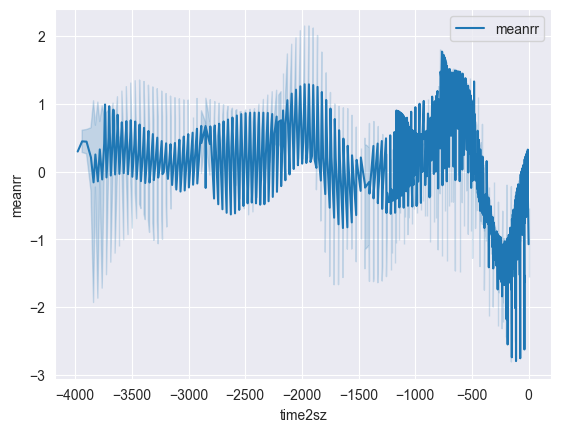

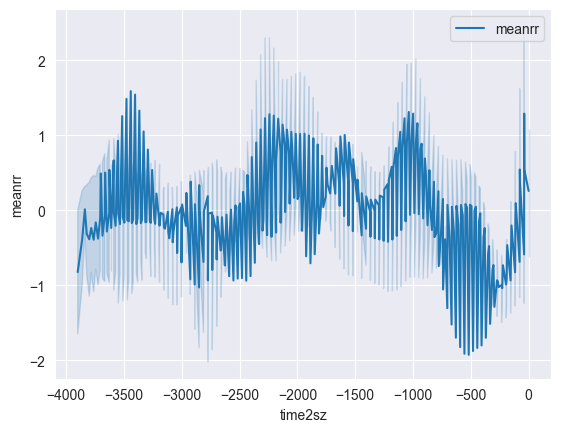

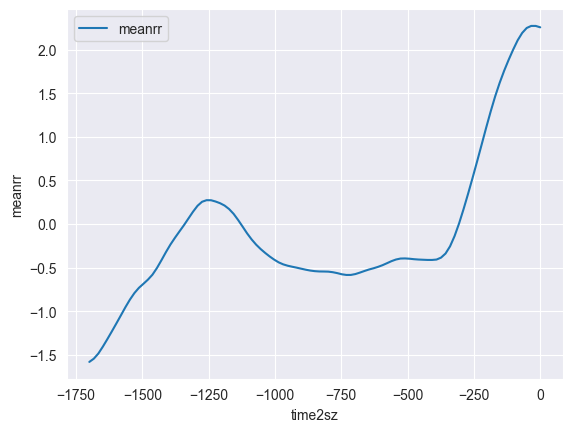

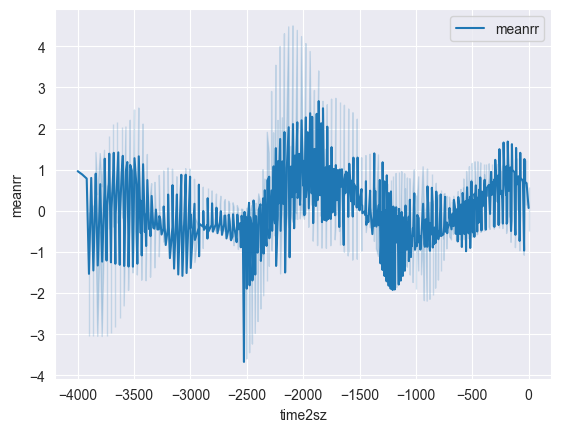

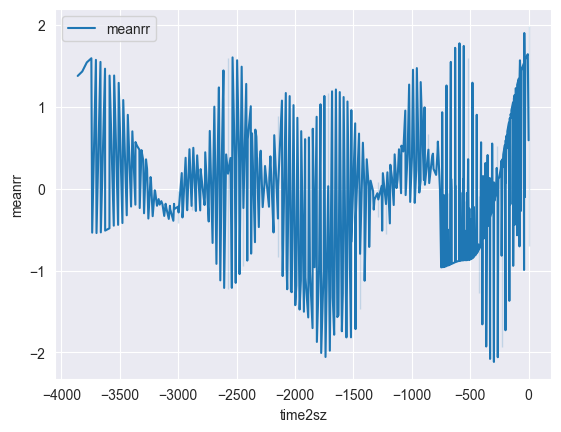

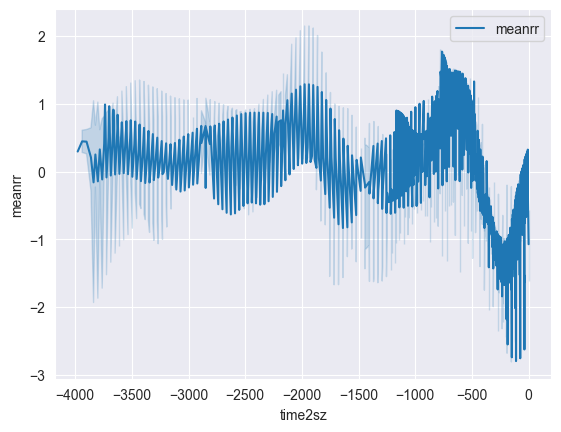

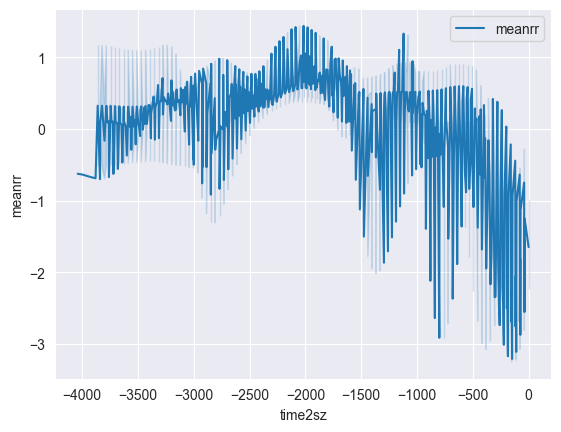

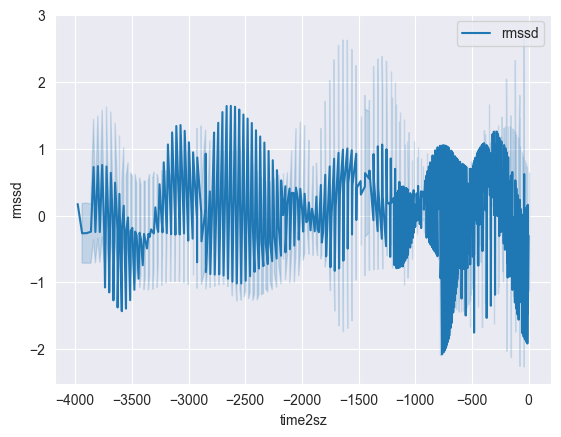

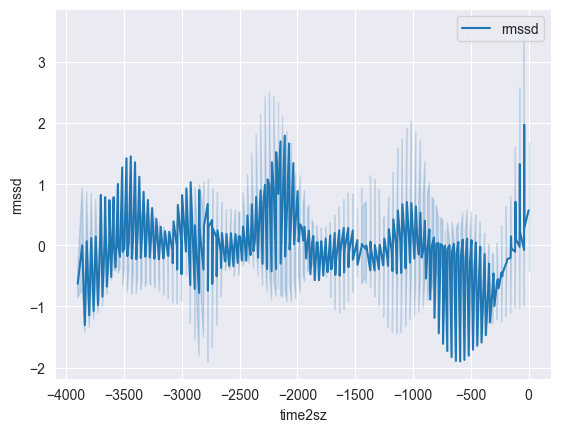

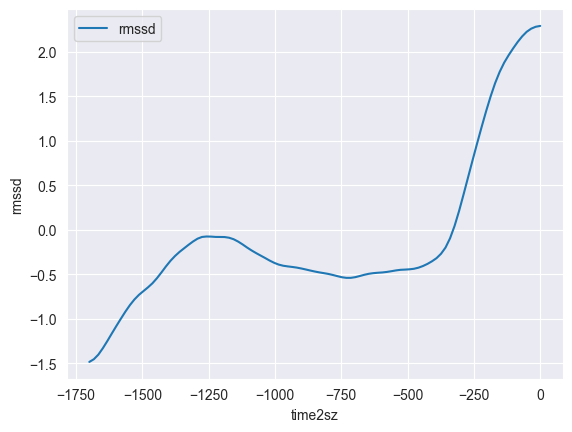

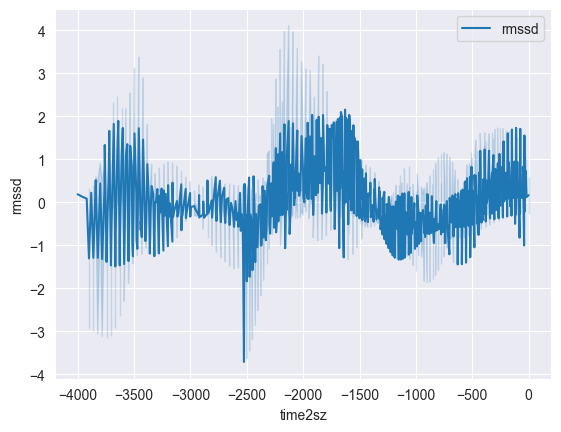

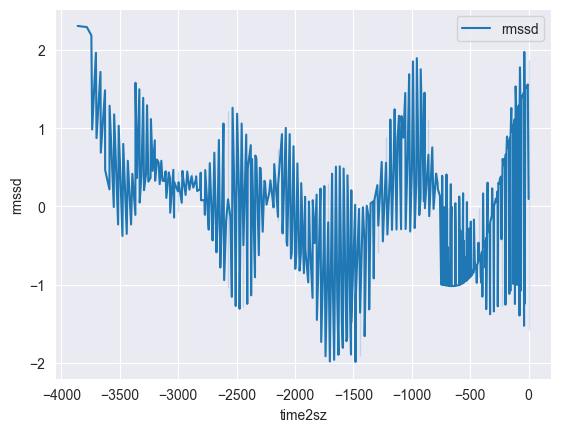

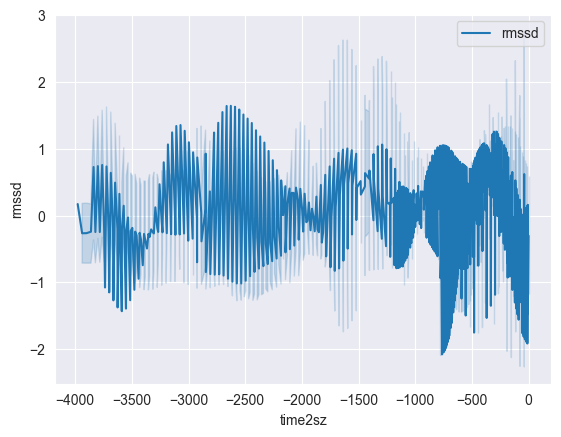

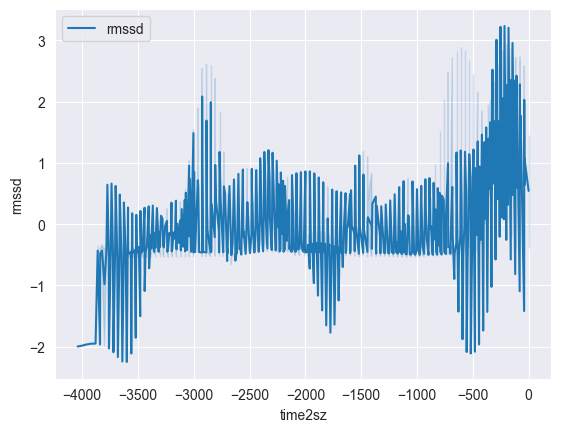

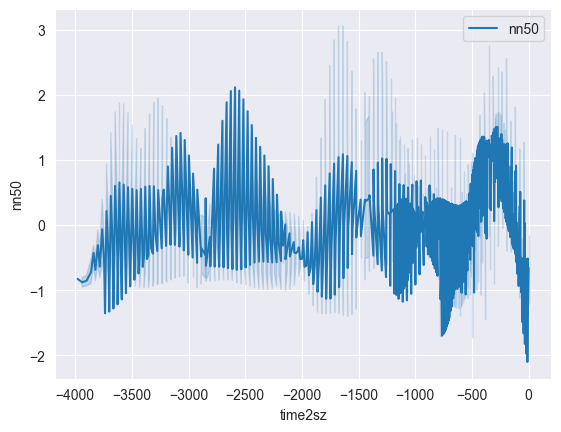

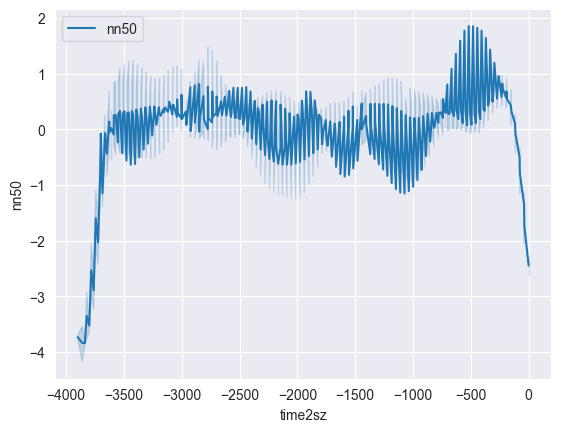

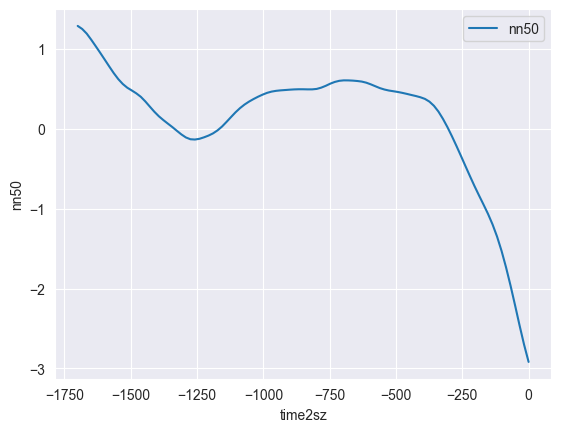

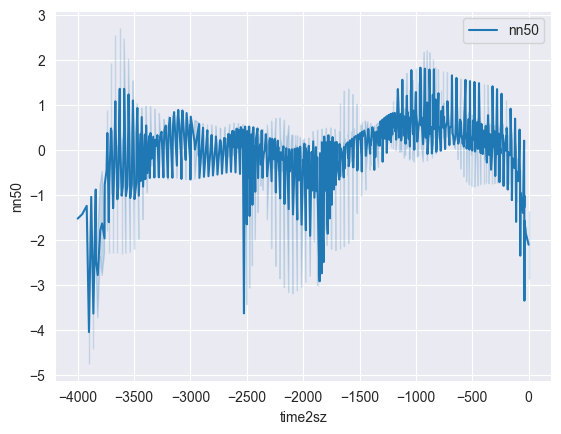

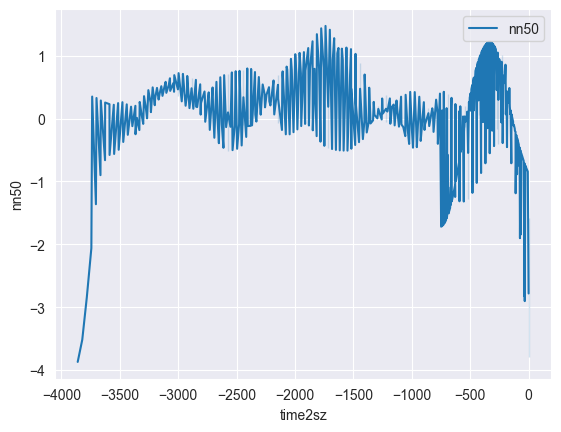

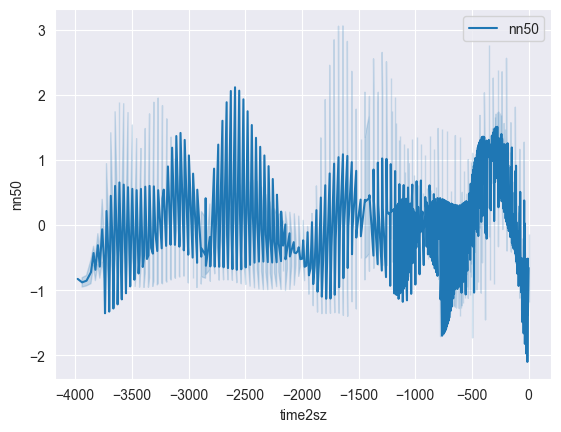

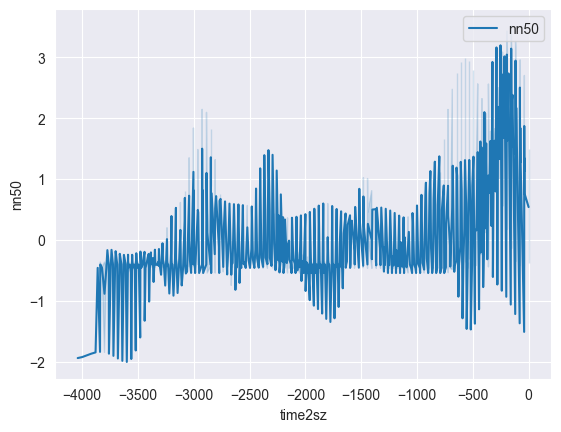

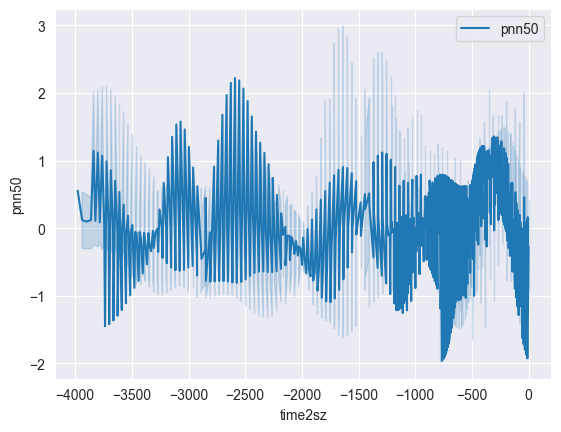

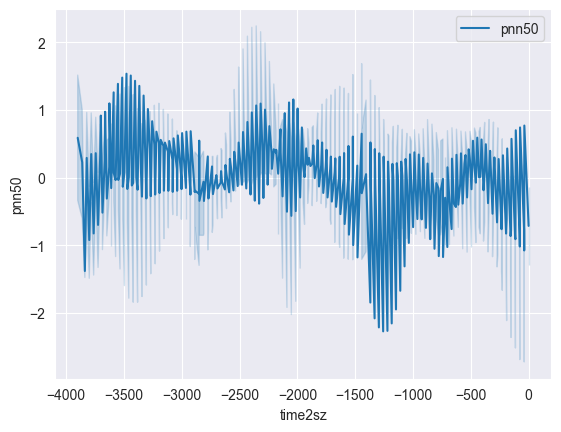

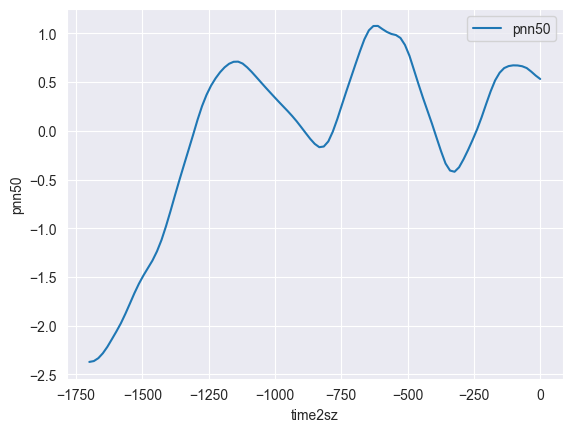

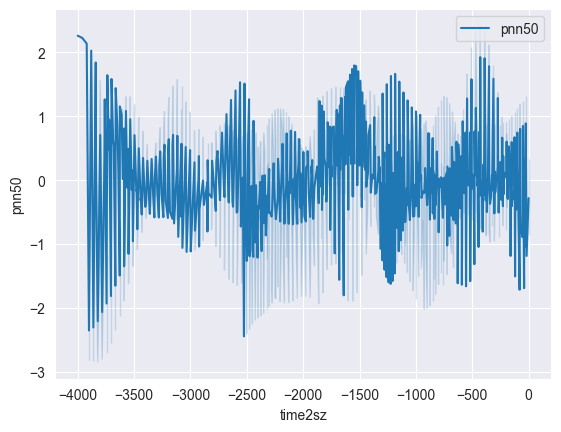

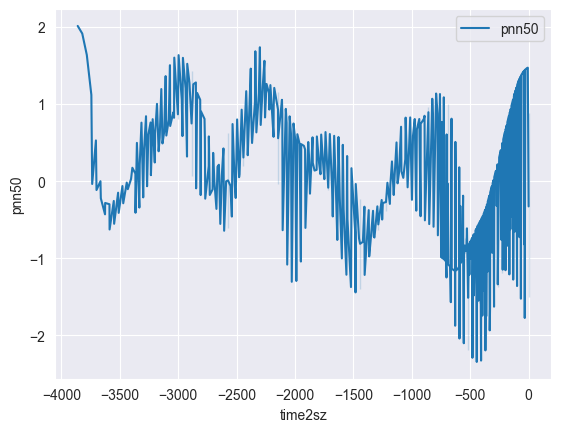

KeyboardInterrupt: 

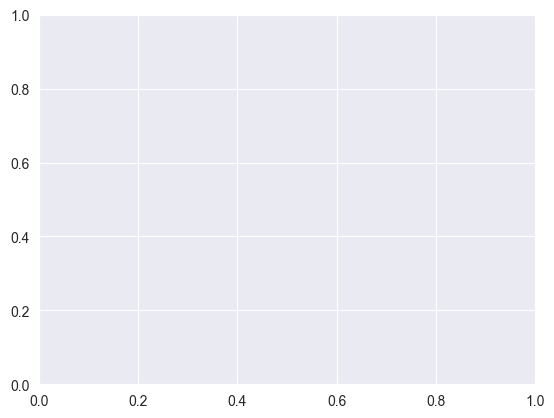

In [24]:
import seaborn as sns
for feat in list_features:
    for pat in patient_train:
        pat_seizures = pd.read_parquet(f'..\data\clean_features_p{pat}_seizure.parquet')
        plt.figure()
        sns.lineplot(data = pat_seizures, x = 'time2sz', y = feat, label=feat)
        plt.legend()
        plt.show()